In [1]:
import tensorflow as tf

In [2]:
train_data_directory = '/Users/wacats_wh/Desktop/Workspace/chihuahua-vs-muffin/image_dataset/train'
test_data_directory = '/Users/wacats_wh/Desktop/Workspace/chihuahua-vs-muffin/image_dataset/test'

In [3]:
image_height = 224
image_width = 224
image_dimension = (image_height, image_width)
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_directory,
    labels = 'inferred',
    seed = 8,
    image_size = image_dimension, # Image dimension
    batch_size = batch_size # How many images to load in 1 batch
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_directory,
    labels = 'inferred',
    seed = 8,
    image_size = image_dimension, # Image dimension
    batch_size = batch_size # How many images to load in 1 batch
)

Found 4733 files belonging to 2 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 1184 files belonging to 2 classes.


2023-12-20 22:47:36.850052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-20 22:47:36.850155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
class_names = train_ds.class_names
print(class_names)

['chihuahua', 'muffin']


In [5]:
import matplotlib.pyplot as plt
def preview_images(dataset):
    plt.figure(figsize = (10, 10))
    for images, labels in dataset.take(1):
        for i in range(16):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')

2023-12-20 22:47:37.282420: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


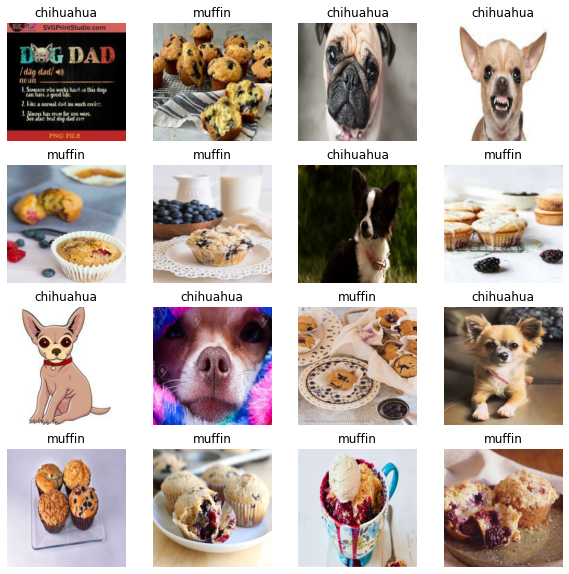

In [6]:
preview_images(train_ds)

In [9]:
from tensorflow import keras
from tensorflow.python.keras import layers

num_of_classes = len(class_names)

model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_of_classes) # Output layer
])

In [10]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

epochs = 5

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)

Epoch 1/5


2023-12-20 23:58:31.750755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - ETA: 0s - loss: 0.6482 - accuracy: 0.7095

2023-12-20 23:58:49.252834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 21s 243ms/step - loss: 0.6482 - accuracy: 0.7095 - val_loss: 0.4231 - val_accuracy: 0.8133
Epoch 2/5
74/74 [==============================] - 17s 219ms/step - loss: 0.3536 - accuracy: 0.8441 - val_loss: 0.3292 - val_accuracy: 0.8564
Epoch 3/5
74/74 [==============================] - 18s 228ms/step - loss: 0.2816 - accuracy: 0.8857 - val_loss: 0.3005 - val_accuracy: 0.8784
Epoch 4/5
74/74 [==============================] - 17s 223ms/step - loss: 0.2177 - accuracy: 0.9117 - val_loss: 0.3027 - val_accuracy: 0.8733
Epoch 5/5
74/74 [==============================] - 18s 228ms/step - loss: 0.1637 - accuracy: 0.9394 - val_loss: 0.3893 - val_accuracy: 0.8733


In [12]:
def plot_history(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(epochs)
    
    plt.figure(figsize = (10, 10))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label = 'Training Accuracy')
    plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

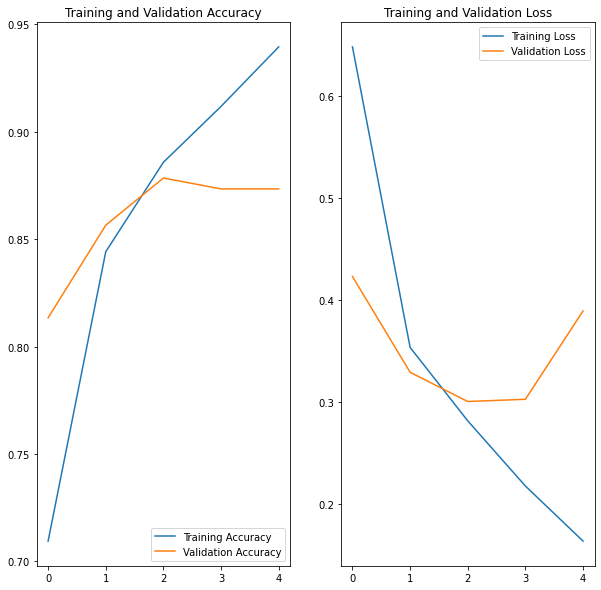

In [13]:
plot_history(history, epochs)